  
<div style="border-radius:10px; padding: 15px; background-color: #b4dade; font-size:115%; text-align:center">

<h3 align="center"><font color=#9c1798>Flight Passenger Satisfaction Analysis</font></h3>

 <a id="contents_label"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #b4dade; font-size:115%; text-align:left">

<h3 align="left"><font color=#1a5276>Table of Contents:</font></h3>

* [1. Introduction and Highlights of Dataset](#intro)
  - [1.1 Importing Packages and Dataset](#import)
* [2. Dataset Overview](#dataset)
    - [2.1 Key attributes](#attributes)
    - [2.2 Overview of Dataframe Structure](#dataframe)
    - [2.3 Dropping unwanted columns](#dropping)
    - [2.4 Verifying Duplicates](#duplicates)
    - [2.5 View Categorical Values](#categorical)
    - [2.6 Summary of Numerical Statistical Properties](#statistical) 
* [3. Data Cleaning and Preprocessing](#preprocessing)
  - [3.1.1 Identifying & Handling Missing Values](#missing)
  - [3.1.2 Finding Outliers](#outliers)
  - [3.1.3 Handling Outliers](#handling)
  - [3.2 Understanding Distribution of Service Scores](#distribution)
  - [3.3 Data Normalisation & Scaling](#normalisation)
  - [3.3.1 Age Distribution](#distribution1)
  - [3.3.2 Flight Distance Distribution](#distribution2)
  - [3.4 Data Transformation](#transformation)
    
* [4. Exploratary Data Analysis (EDA)](#EDA)
  - [4.1 Understanding customers and travel types](#customer-types)
  - [4.2 Flight Distance Contribution by Age Group](#distance)
  - [4.3 Satisfcation by Flight Class](#class)
  - [4.4 Service Ratings by Customer Type](#ratings)
  - [4.5 Delay Frequency & intervals](#delay)
  - [4.6 Service Usage by Flight Distance Travelled](#usage)
  - [4.7 Multivariate Analysis](#correlation)
    
* [5. Data limitations & improvements](#limitations)
  - [5.1 Data Collection and Refinement](#refinement)
* [6. Potential Future Work - Advanced Modeling](#model)
* [7. Overall Conclusion](#conclusion)
* [8. References](#references)



<a id="intro"></a>

️ [Tabel of Contents](#contentl_tal)l<h3 align="left"><font color=#8c2d45>1. Introduction and Highlights of Dataset</font></h3>



The Flight Passenger Satisfaction Dataset provides a comprehensive view of customer experiences within the aviation industry, focusing on factors that drive passenger satisfaction. It includes variables related to on-board services, in-flight entertainment, flight delays, and other service features, helping to identify both pain points and areas of passenger preference.

As a data analyst, my goal is to apply data mining and exploratory analysis techniques to uncover key patterns and insights. This analysis aims to offer a holistic understanding of service-related challenges and operational efficiency, ultimately guiding decision-making for improving passenger satisfaction.

<a id="import"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>1.1 Importing Packages and Dataset</font></h3>

In [28]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

In [30]:
flight = pd.read_csv("airline_passenger_satisfaction.csv")

<a id="dataset"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>2. Dataset Overview</font></h3>

In [33]:
print("Dimension of the data:", flight.shape) #Understanding data dimensions

Dimension of the data: (129880, 24)


<a id="attributes"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45> 2.1 Key attributes</font></h3>

In [36]:
flight.keys() #Display columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [38]:
flight.head(5) #Viewing top 5 rows of dataset

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


<a id="dataframe"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45> 2.2 Overview of Dataframe Structure</font></h3>

In [41]:
flight.info() #Overview of DataFrame Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

<a id="dropping"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>2.3 Dropping unwanted columns</font></h3>

In [44]:
flight = flight.drop(columns=[ 'Departure and Arrival Time Convenience'])



<div style="background-color:#f6f5d5; padding: 10px;">
<b>Departure and Arrival Time Convenience</b> -  a more subjective rating based on convenience of own needs (e.g., satisfaction with the timing of the flight) rather than an objective measure of how delayed a flight was.The columns are not important as they do not significantly influence customer satisfaction or any key insights we are aiming to uncover. 

<a id="duplicates"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>2.4 Verifying Duplicates</font></h3>

In [48]:
# Check for duplicates in the DataFrame
duplicates = flight.duplicated()

# Print the total number of duplicates found
print(f'Total duplicates found: {duplicates.sum()}')


Total duplicates found: 0


<div style="background-color:#f6f5d5; padding: 10px;">
 <b>No duplicates found. </b>It indicates that the data is more likely to be accurate and reliable. The data is distinct and will not lead to skewed analyses and misinterpretation of results.



<a id="categorical"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>2.5 View Categorical Values</font></h3>

In [52]:
# see quick info of category values 
flight.describe(include = object)


,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


<a id="statistical"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>2.6 Summary of Numerical Statistical Properties</font></h3>

In [55]:
flight.describe() #summary of the statistical properties of the numerical columns

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<h3 align="left"><font color=#8c2d45> Summary of Results</font></h3>
<div style="background-color:#f6f5d5; padding: 10px;">
    
 - **Count:**
  - Most columns have a count of **129,880**, indicating no missing values, except for **Arrival Delay** with a count of **129,487**. 
  - **393** entries are missing this value; further investigation is recommended.

- **Age:**
  - Mean age of passengers: **39 years**
  - Age range: **7 to 85 years**
  - Standard deviation: **15.12** (indicating variability)

- **Flight Distance:**
  - Average flight distance: **1,190.32 miles**
  - Range: **31 miles to 4,983 miles**
  - Standard deviation: **997.45** (indicating varying flight distances)

- **Delays:**
  - Mean Departure Delay: **14.71 minutes** (max: **1,592 minutes**; indicates outliers)
  - Mean Arrival Delay: **15.09 minutes** (max: **1,584 minutes**; indicates potential outliers)

- **Service Ratings:**
  - Ratings (1 to 5) show average scores between **2.7 and 4.0**.
  - Notably, **In-flight Service** has a mean rating of **4.0**, indicating high satisfaction.


<a id="preprocessing"></a>
⬆️ [Tabel of Contents](#contents_label)
<h2 align="left"><font color=#8c2d45>3. Data Cleaning and Preprocessing</font></h2>

<a id="missing"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45> 3.1.1 Identifying & Handling Missing Values</font></h3>

In [60]:
flight.isnull().sum()

ID                           0
Gender                       0
Age                          0
Customer Type                0
Type of Travel               0
Class                        0
Flight Distance              0
Departure Delay              0
Arrival Delay              393
Ease of Online Booking       0
Check-in Service             0
Online Boarding              0
Gate Location                0
On-board Service             0
Seat Comfort                 0
Leg Room Service             0
Cleanliness                  0
Food and Drink               0
In-flight Service            0
In-flight Wifi Service       0
In-flight Entertainment      0
Baggage Handling             0
Satisfaction                 0
dtype: int64

In [39]:
# Imputing missing value with mean
flight['Arrival Delay'] = flight['Arrival Delay'].fillna(flight['Arrival Delay'].mean())

<div style="background-color:lightyellow; padding: 10px;">
    
<h4 align="left"><font color=#8c2d45>Rationale:</font></h4>
The missing values in the arrival delay attribute can impact passenger satisfaction. Using mean imputation ensures a balanced dataset, preserving the overall distribution without introducing bias.

<a id="outliers"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45> 3.1.2 Finding Outliers</font></h3>

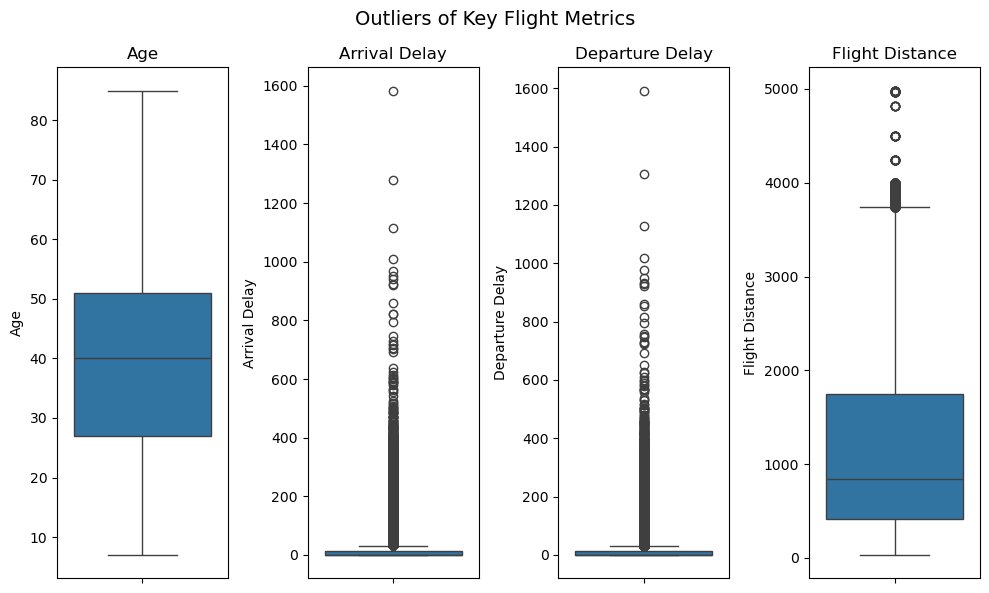

In [64]:
# Specifying key columns to include in the box plots
selected_columns = ['Age','Arrival Delay','Departure Delay','Flight Distance']

# Plot box plots for the selected numerical columns
plt.figure(figsize=(10,6))
plt.suptitle("Outliers of Key Flight Metrics", size=14)
for i, column in enumerate(selected_columns, 1):
    plt.subplot(1, 4, i)  # Create a single row (1 row, 4 columns)
    sns.boxplot(data=flight, y=column, orient='v')  # Set orient='v' to ensure vertical boxplot
    plt.title(f'{column}')
    plt.tight_layout()

plt.show()


<a id="handling"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45> 3.1.3 Handling Outliers</font></h3>

<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d>Interpretation</font></h4>
- The four attributes chosen for outlier analysis play a vital role satisfaction trends and service preferences. There are no outliers noted on <font color='#128149'> Age </font> whereas significantly noted on <font color='#813912'> Arrival Delay, Departure Delay & Flight Distance</font> which disproportionately influence insights into service needs. 

- The remove_outliers function filters out outliers from specified columns in the DataFrame by using the Interquartile Range (IQR) method. It defines lower and upper bounds based on the quartiles and returns a DataFrame that excludes values outside these bounds, ensuring a cleaner dataset for analysis.


In [67]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of columns to check for outliers
columns_to_check = ['Arrival Delay', 'Flight Distance', 'Departure Delay']

# Apply the remove_outliers function directly on the flight DataFrame
for column in columns_to_check:
    flight = remove_outliers(flight, column)

# Now the flight DataFrame has outliers removed from the specified columns


<a id="distribution"></a>
⬆️ [Tabel of Contents](#contents_tabel)
<h3 align="left"><font color=#8c2d45>3.2 Understanding Distribution of Service Scores</font></h3>

In [48]:
Rating_Columns =flight.loc[:,'Ease of Online Booking':'Baggage Handling'].columns.tolist()
print(Rating_Columns)  #extracting range of columns to be analysed as service types

['Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


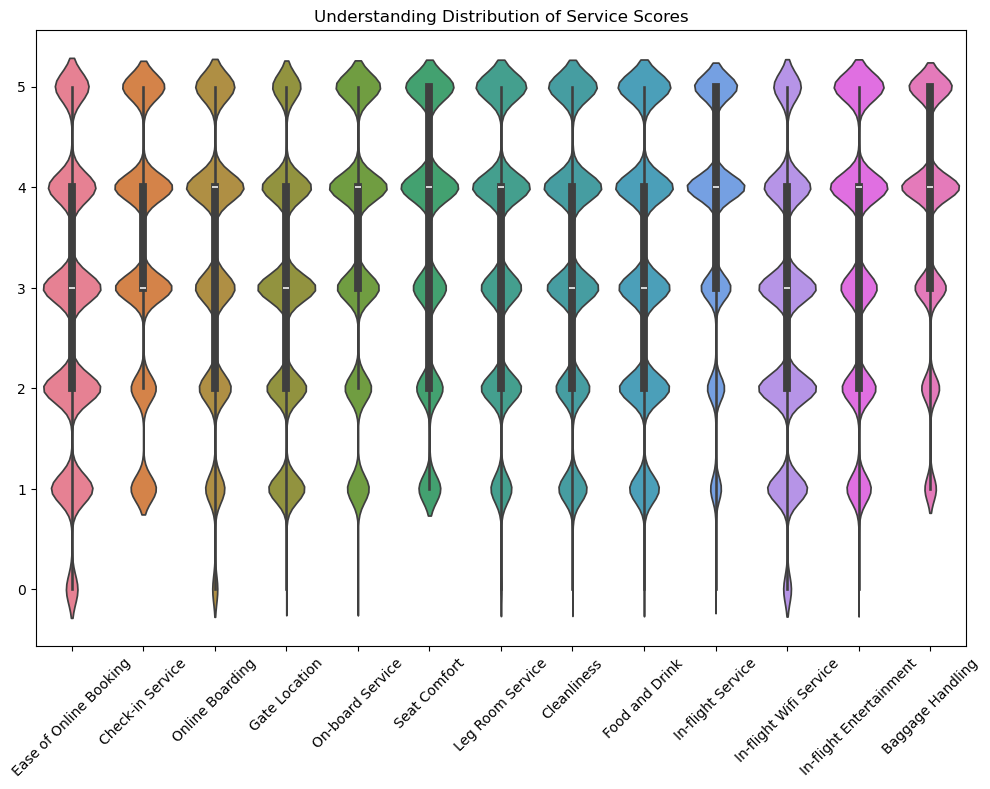

In [49]:
# Violin plot for understanding score distribution and frequency 
plt.figure(figsize=(12, 8))
sns.violinplot(data=flight[Rating_Columns])
plt.title('Understanding Distribution of Service Scores')
plt.xticks(rotation=45)
plt.show()


<div style="background-color:lightyellow; padding: 10px;">
A violin plot combines features of box plots and density plots to show the distribution of scores across service categories (Rating_Columns). The width of each "violin" indicates score density, revealing where scores are concentrated.

The plot highlights the presence of zero (0) scores in several categories, represented by thinner sections. These scores were identified as inappropriate for measuring satisfaction and excluded from further analys.
nces.


<div style="background-color:lightyellow; padding: 10px;">
<h4 align="left"><font color=#0c1c6d> Implications for Satisfaction Measurement</font></h4>

A score of 0 may reflect non-response, confusion, or dissatisfaction unrelated to service quality. Including these scores could skew the analysis and yield unreliable satisfaction indicators. 

Excluding 0 scores ensures the analysis focuses on meaningful responses (1 to 5), accurately reflecting satisfaction levels and service quality. This approach aims to provide a more valid evaluation by concentrating on scores that represent customer expe

Irrelevant zero responses may signal confusion or extreme dissatisfaction. Including them skews satisfaction ratings, so removing them refines the dataset, ensuring the analysis is focused on genuine feedback. Handling these issues improves data quality and leads to more trustworthy conclusions.riences.


In [51]:
# Remove rows where any of the specified columns have a score of 0
flight = flight[~(flight[Rating_Columns] == 0).any(axis=1)]

<h4 align="left"><font color=#0c1c6d><u>Handling zero scores</u></font></h4>
<div style="background-color:lightyellow; padding: 10px;">
<h5 align="left"><font color=#8c2d45><b>Data Integrity:</b></font></h5>

- Zero scores could represent various issues, including survey fatigue, misunderstanding of the scoring system, or non-response. Removing these can help maintain the integrity of your dataset.
- By excluding these outliers, the nalysis will be based on valid feedback, leading to more reliable insights into customer satisfaction.

<h5 align="left"><font color=#8c2d45><b>Improved Analysis:</b></font></h5>
- Removing zeros allows for a more precise understanding of customer satisfaction and service quality.
- The remaining scores (1-5) reflect active engagement and thoughtful responses from customers.
- This approach also aids in achieving a balanced dataset that more accurately reflects the true customer experience

<a id="normalisation"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45> 3.3 Data Normalisation & Scaling</font></h3>

<div style="background-color:lightyellow; padding: 10px;">
    
<a id="distribution1"></a>
⬆️ [Tabel of Contents](#contents_label)
<h4 align="left"><font color=#8c2d45>3.3.1 Age Distribution</font></h4>


<h4 align="left"><font color=#0c1c6d><u>Understanding Demographics</u></font></h4>
The age variable in our dataset is a critical demographic attribute that can significantly influence customer behavior and satisfaction. Understanding its distribution is essential for accurate statistical analysis. The histogram presents an examination of the age distribution within the dataset, focusing on its normality and implications for further analysis.

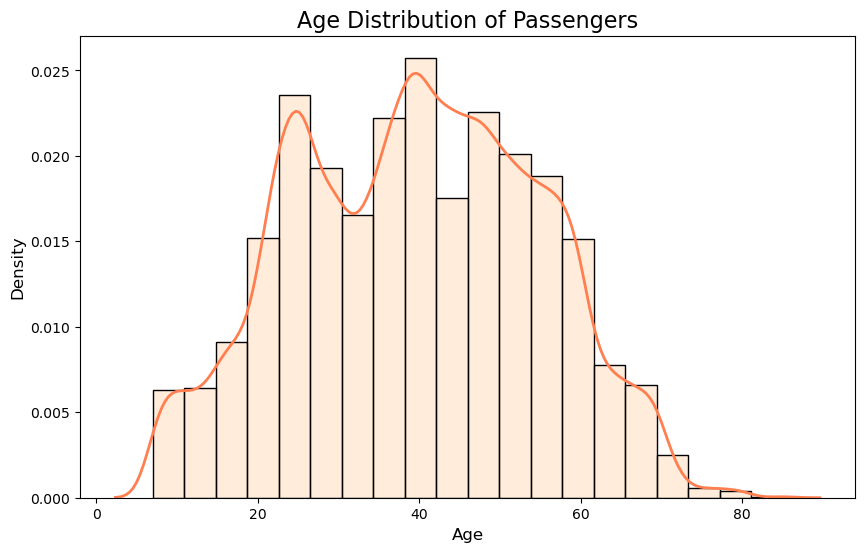

In [58]:

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(flight['Age'], bins=20, color='peachpuff', kde=False, stat="density", alpha=0.5)

# Overlay a KDE line
sns.kdeplot(flight['Age'], color='coral', linewidth=2)

# Add titles and labels
plt.title('Age Distribution of Passengers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()


In [59]:
age_stats = flight['Flight Distance'].describe()
print(age_stats)

count    89810.000000
mean      1140.331834
std        923.084657
min         31.000000
25%        413.000000
50%        833.000000
75%       1678.000000
max       3740.000000
Name: Flight Distance, dtype: float64


<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d> Interpretation:</font></h4>

- The histogram of the age distribution reveals a bell-shaped curve, indicating that the age variable is approximately normally distributed.
- The average age is 40 years old.
- The normality of age facilitates the comparison of satisfaction levels across different customer groups (e.g., first-time vs. returning travelers).
- This finding enhances the reliability of our analyses and strengthens our understanding of customer demographics in relation to satisfaction and service performance.

<a id="distribution2"></a>
⬆️ [Tabel of Contents](#contents_label)
<h4 align="left"><font color=#8c2d45>3.3.2 Flight Distance Distribution</font></h4>

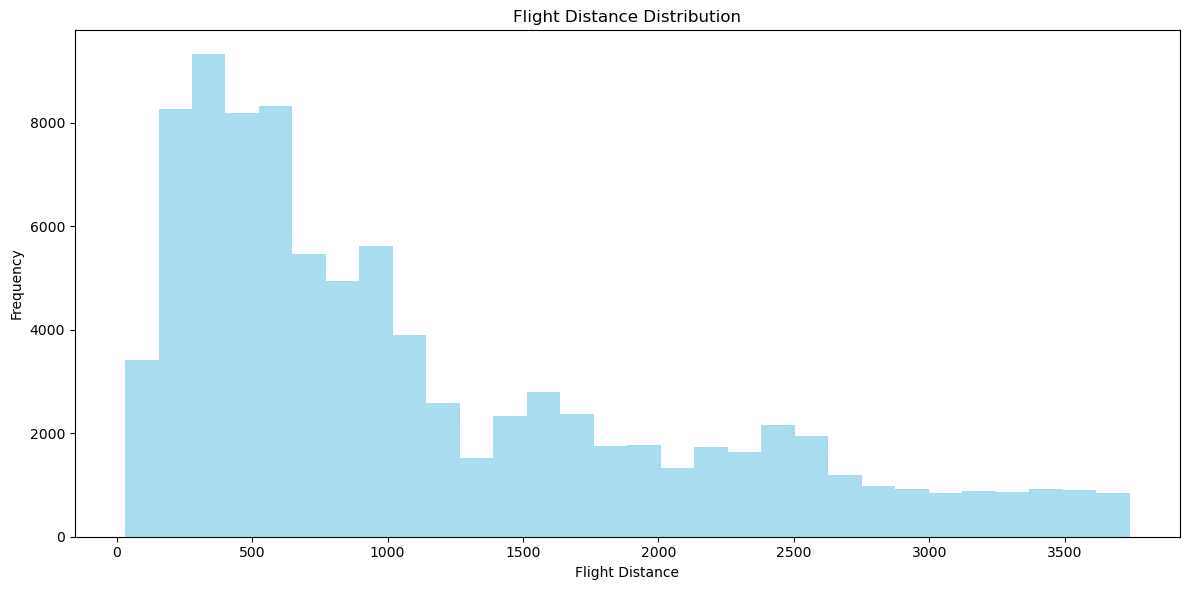

In [62]:
# Plot the histogram of scaled values
plt.figure(figsize=(12, 6))

# Histogram for scaled flight distance
plt.hist(flight['Flight Distance'], bins=30, color='skyblue', alpha=0.7)
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<div style="background-color:lightyellow; padding: 10px;">

This code visualizes the distribution of flight distances from the dataset, showing how frequently different flight distance ranges occur. It allows for easier identification of trends, such as whether most flights are short, long, or distributed across a wide range of distances.

Preference for Short flight
:
A larger concentration of customers opting for shorter flights indicates a preference for more accessible travel options. This could be influenced by factors s ch as convenience, cost, and availability. It suggests that a significant portion of the customer base may prioritize quick trips over longer journeLon
Longer Flights:
The presence of fewer, longer flights indicates that while there is demand for longer journeys, they are not the norm. These may represent special occasions, business travel, or specific routes that don't attract frequent travelers. This highlights a potential market segment that could be targeted differently compared to the majority of customers.



<a id="transformation"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>3.4 Data Transformation</font></h3>

<div style="background-color:#f6f8d7; padding: 10px;">

<h4 align="left"><font color=#8c2d45>3.4.1 Feature Engineering</font></h4>

<h5 align="left"><font color=#0c1c6d>Aggregating Service Scores:</font></h5> By averaging service scores across different types, uncovering overall trends simplifies the analytical process. This enables optimal visualization and provides insights that may not be evident in raw scores from individual customers.

<h5 align="left"><font color=#0c1c6d>Age Binning:</font></h5> Grouping ages into brackets facilitates analysis and visualization, highlighting trends in customer distribution that individual ages might obscure.

<div style="background-color:lightyellow; padding: 10px;">
<h5 align="left"><font color=#0c1c6d><u>Aggregating Service Scores</u></font></h5>

In [66]:
Rating_Columns = [
    'Ease of Online Booking', 
    'Check-in Service', 
    'Online Boarding', 
    'Gate Location', 
    'On-board Service', 
    'Seat Comfort', 
    'Leg Room Service', 
    'Cleanliness', 
    'Food and Drink', 
    'In-flight Service', 
    'In-flight Wifi Service', 
    'In-flight Entertainment', 
    'Baggage Handling'
]

# Calculate average score across the specified rating columns
flight['Average Score'] = flight[Rating_Columns].mean(axis=1)

# Convert average scores to DataFrame for better formatting
average_scores_df = flight[Rating_Columns + ['Average Score']].mean().reset_index()
average_scores_df.columns = ['Service Type', 'Average Score']

# Display the average scores
print(average_scores_df)



               Service Type  Average Score
0    Ease of Online Booking       2.895914
1          Check-in Service       3.316123
2           Online Boarding       3.341844
3             Gate Location       2.978354
4          On-board Service       3.408663
5              Seat Comfort       3.454270
6          Leg Room Service       3.376640
7               Cleanliness       3.298608
8            Food and Drink       3.224953
9         In-flight Service       3.673756
10   In-flight Wifi Service       2.852767
11  In-flight Entertainment       3.387117
12         Baggage Handling       3.651286
13            Average Score       3.296946


<div style="background-color:lightyellow; padding: 10px;">
<h5 align="left"><font color=#0c1c6d><u>Age Binning</u></font></h5>

In [67]:
# Define age bins and labels
bins = [0, 18, 29, 39, 49, 59, 100]
labels = ['0-17', '18-28', '29-38', '39-48', '49-58', '59+']

# Create Age Group column
flight['Age Group'] = pd.cut(flight['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(flight[['Age', 'Age Group']].head(5))  # Show more rows to check


   Age Age Group
0   48     39-48
2   41     39-48
3   50     49-58
4   49     49-58
6   43     39-48


<a id="EDA"></a>
⬆️ [Tabel of Contents](#contents_label)

<h3 align="left"><font color=#8c2d45> 4. Exploratary Data Analysis (EDA)</font></h3>

<a id="customer-types"></a>
⬆️ [Tabel of Contents](#contents_label)
<h4 align="left"><font color=#8c2d45> 4.1 Understanding customers and travel types</font></h4>

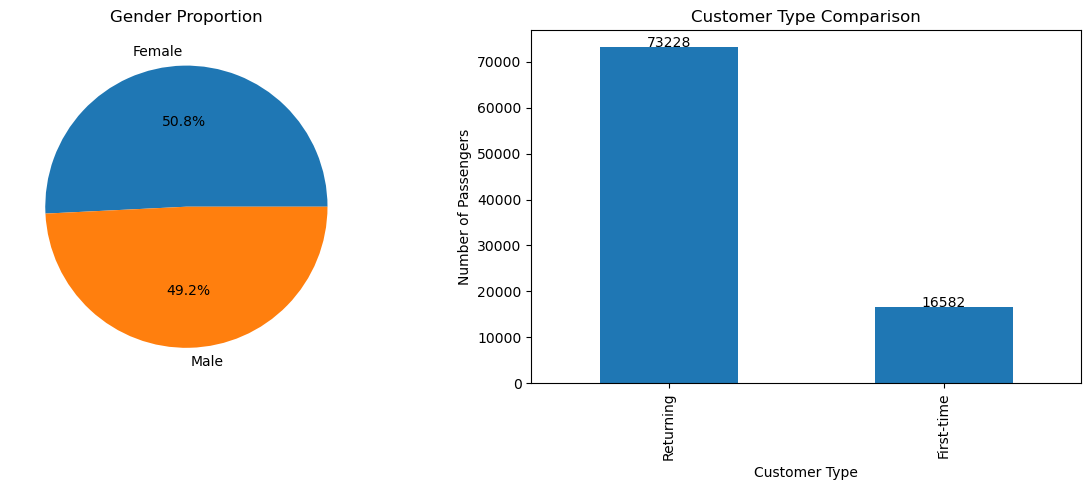

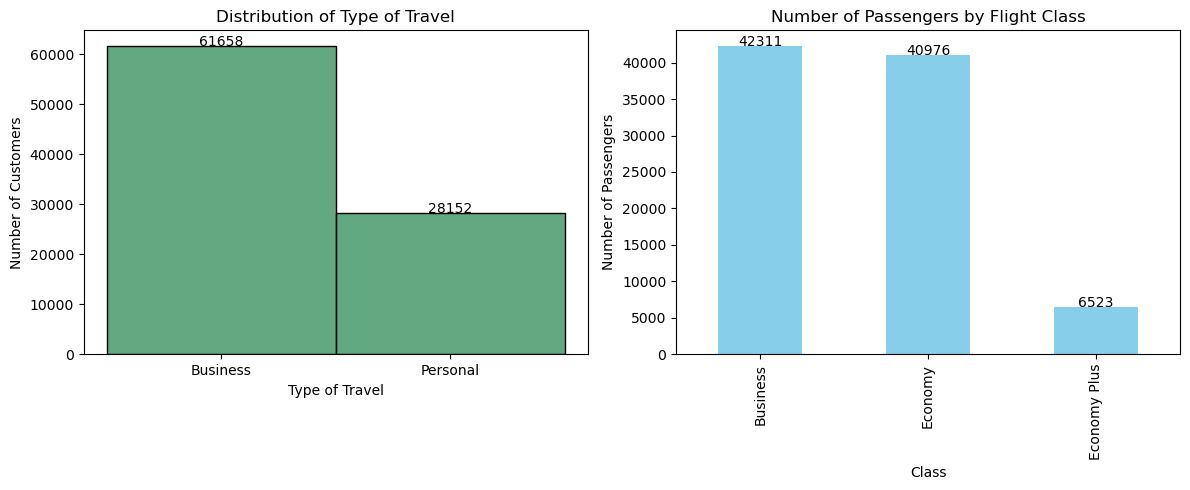

In [206]:
# Set the figure size
plt.figure(figsize=(12, 5))  # Adjust the figure size (width, height)

# Plot 1: Gender (Pie chart)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
flight['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Proportion')
plt.ylabel('')  # Remove y-axis label for pie chart

# Plot 2: Customer Type (Bar chart)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
flight['Customer Type'].value_counts().plot(kind='bar', title='Customer Type Comparison')
plt.ylabel('Number of Passengers')

# Add total counts for Customer Type
for i in range(len(flight['Customer Type'].value_counts())):
    plt.text(i, flight['Customer Type'].value_counts().values[i] + 2, 
             flight['Customer Type'].value_counts().values[i], 
             ha='center')

# Adjust layout
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Set the figure size for both charts
plt.figure(figsize=(12, 5))

# Plot 1: Distribution of Type of Travel
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
ax1 = sns.histplot(x="Type of Travel", data=flight, color="seagreen", kde=False, bins=len(flight['Type of Travel'].unique()))  # Using histplot for Type of Travel
plt.title('Distribution of Type of Travel')
plt.ylabel('Number of Customers')

# Show counts on bars for Type of Travel
counts = flight['Type of Travel'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 2, count, ha='center')

# Plot 2: Number of Passengers by Flight Class
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
ax2 = flight['Class'].value_counts().plot(kind='bar', color='skyblue')  # Bar chart for flight class
plt.title('Number of Passengers by Flight Class')
plt.ylabel('Number of Passengers')

# Show counts on bars for Flight Class
class_counts = flight['Class'].value_counts()
for i in range(len(class_counts)):
    plt.text(i, class_counts.values[i] + 2, class_counts.values[i], ha='center')

# Adjust layout
plt.tight_layout()  # Prevent overlap
plt.show()


<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d> Interpretation:</font></h4>

Based on the charts, we can analyze the following:

**Gender Proportion**:
- The dataset exhibits nearly equal representation of both genders, enabling fair comparisons of customer satisfaction, service preferences, and travel patterns for more reliable insights into their travel experiences.

**Customer Type Comparison**:
- Most customers are returning travelers (over 73,000) compared to around 16,000 first-time travelers. This high retention rate reflects customer satisfaction and loyalty; however, the lower count of first-time travelers indicates a need for improved marketing strategies to attract new customers.

**Type of Travel & Passenger Class**:
- A majority of travelers flew for business, with more passengers in business class than in economy. This preference for comfort likely stems from corporate travel, potentially boos.. aigher p


**IDecision-Making:o
n-Making:**
To attract more new customers/first-time travellers, the airline should implement the following:

- <b>Targeted Marketing Campaigns:</b>
Develop campaigns highlighting unique selling points, such as special promotions, discounts for first-time flyers, and exceptional service offerings.

- <b>Referral Programs:</b>
Introduce incentives for existing customers to refer new travelers, offering discounts or perks to both parties for atravel experience.i
ice point.


<a id="distance"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>  4.2 Flight Distance Contribution by Age Group</font></h3>

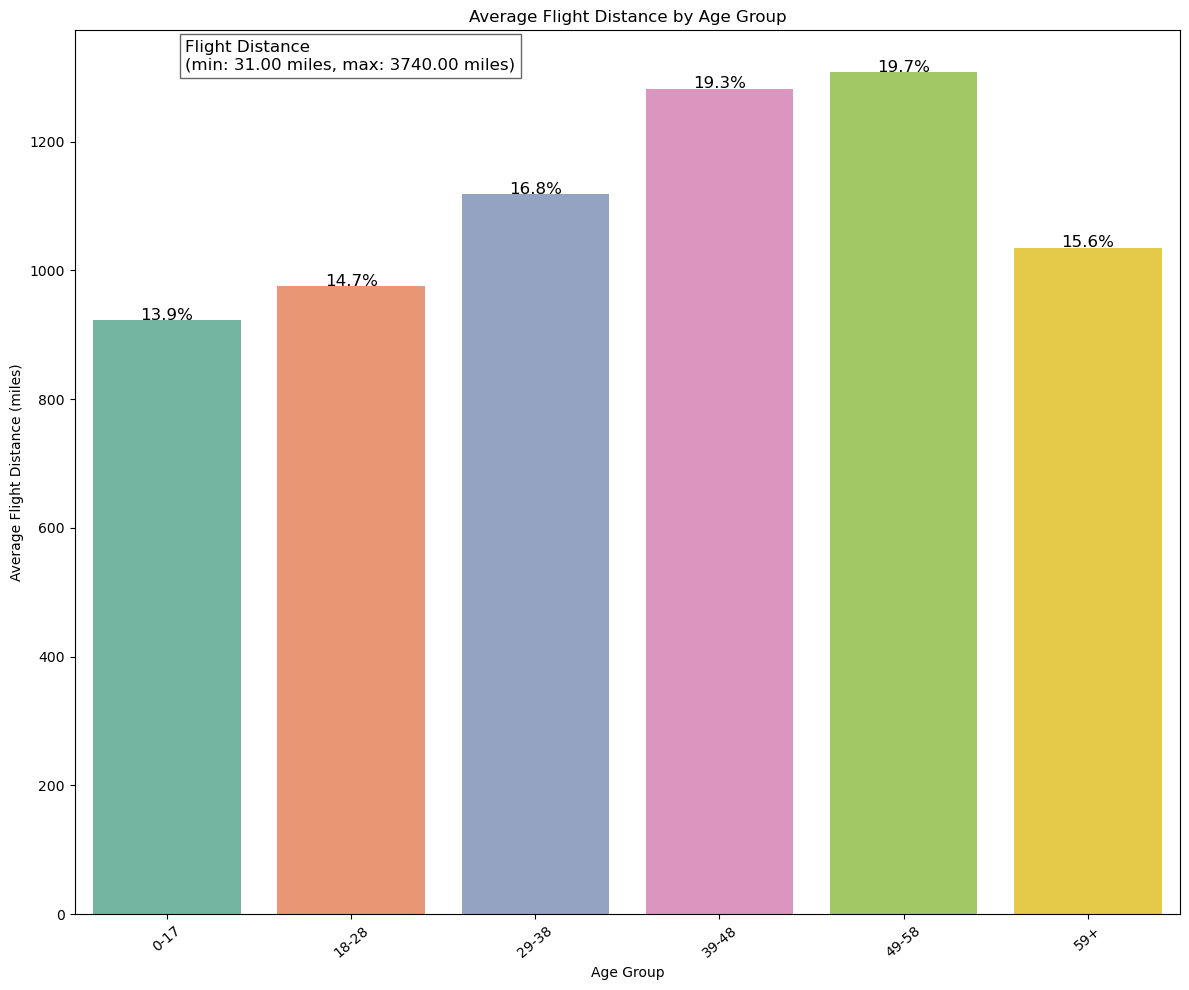

In [74]:
# Step 1: Group by Age Group and calculate average flight distance
age_group_means = flight.groupby('Age Group')['Flight Distance'].mean().reset_index()

# Step 2: Calculate the total flight distance
total_flight_distance = age_group_means['Flight Distance'].sum()

# Step 3: Calculate percentage contribution for each age group
age_group_means['Percentage Contribution'] = (age_group_means['Flight Distance'] / total_flight_distance) * 100

# Step 4: Calculate the original shortest and longest flight distances
min_flight_distance = flight['Flight Distance'].min()
max_flight_distance = flight['Flight Distance'].max()

# Prepare legend text
legend_text = f'Flight Distance\n(min: {min_flight_distance:.2f} miles, max: {max_flight_distance:.2f} miles)'

# Step 5: Create a bar plot
plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(data=age_group_means, x='Age Group', y='Flight Distance', palette='Set2')
plt.title('Average Flight Distance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Flight Distance (miles)')

# Add percentage contribution labels on top of the bars
for index, row in age_group_means.iterrows():
    plt.text(index, row['Flight Distance'] + 1, f"{row['Percentage Contribution']:.1f}%", 
             color='black', ha='center', fontsize=12)

# Dynamically calculate the position for the legend text slightly towards the right
max_y_value = age_group_means['Flight Distance'].max()
plt.text(0.1, max_y_value + 5, legend_text,  # Adjusted the x-position slightly to the right (from 0 to 0.2)
         color='black', ha='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.6), transform=bar_plot.get_yaxis_transform())

plt.xticks(rotation=40)
plt.tight_layout()
plt.show()





<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d> Interpretation:</font></h4>


The bar plot analysis of average scaled flight distance by age group highlights several key trends:

1. **Increased Travel Among Middle-Aged Groups**:
   - Age groups **39-48** and **49-58** contribute the highest percentages of total flight distance1 *314%** d *718%**, respectively. This indicates a strong tendency for travel within these age ranges, likely influenced by career responsibilities, family vacations, and greater disposable income.

2. **Lower Participation from Younger Travelers**:
   - The **0-17** age group contributes onl9 **13.8%** to the total flight distance, suggesting limited travel activity. This could be attributed to parental restrictions or lesser independence in planning travel.

3. **Decline in Travel Among Older Adults**:
   - The **59+** age group shows a contribution of **15.6%**, which is a noticeable decline from the 49-58 group. This suggests potential barriers to travel for older adults, possibly due to health concerns, reduced mobility, or lifestyle changes post-r
eillingness to travel.


<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d> Insights for Decision-Making:</font></h4>

1. **Marketing Focus on Middle-Aged Travelers**:
   - Airlines and travel companies should prioritize marketing strategies targeted toward the **39-58 age groups**. This demographic represents the largest share of flight distance, indicating strong travel demand.

2. **Encouraging Family Travel**:
   - Given the low percentage from the **0-17** age group, creating family-oriented travel packages could encourage more travel participation among younger travelers. This might involve promotions or discounts for families traveling with children.

3. **Enhance Support for Older Travelers**:
   - Airlines should create services catering to the **59+** group, such as accessibility features and senior discounts, to encourage travel.


<a id="class"></a>
⬆️ [Tabel of Contents](#contents_label)
<h4 align="left"><font color=#8c2d45>4.3 Satisfcation by Flight Class</font></h4>

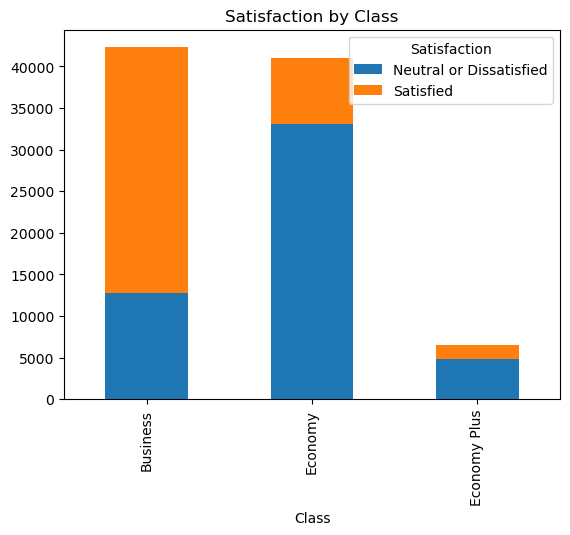

In [78]:
pd.crosstab(flight['Class'], flight['Satisfaction']).plot(kind='bar', stacked=True)
plt.title('Satisfaction by Class')
plt.show()



<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d> Interpretation:</font></h4>

<h4 align="left"><font color=#0c1c6d> Distribution of Satisfaction Levels:</font></h4>

- **Business Class:** Generally shows higher satisfaction levels, with a notable percentage of satisfied customers. This indicates that passengers in business class appreciate the services and amenities offered, reflecting a positive perception of their travel experience.
  
- **Economy:** This class also has a substantial number of dissatisfied customers, suggesting that potential operational or service-related issues that may need addressing to improve the overall experience.
  
**Economy Plus:** Displays a mixed satisfaction level with a higher proportion of neutral and dissatisfied passengers compared to the other classes. This indicates that while few customers may find the service acceptable, a significant portion is not fully satisfied.



<h4 align="left"><font color=#0c1c6d> Insights for Decision-Making:</font></h4>

1. **Focus on Economy Class Improvements**: 
   - Address operational or service-related issues in economy class to improve overall passenger satisfaction. Enhancing comfort, providing more personalized services, or optimizing boarding and disembarkation processes can make a significant difference.

2. **Loyalty Program for Economy Travelers**: 
   - Develop or improve a loyalty program specifically tailored to economy passengers. Offering rewards such as free upgrades, additional baggage allowance, or future discounts can foster customer retention and incentivize frequent travel.

3. **Flexible Pricing and Bundled Packages**: 
   - Implement dynamic pricing strategies or introduce bundled packages that combine essential services (e.g., baggage, meals) at a competitive price. This can improve the perceived value of economy class and attract more price-conscious travelers.


<a id="ratings"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45> 4.4 Service Ratings by Customer Type</font></h3>

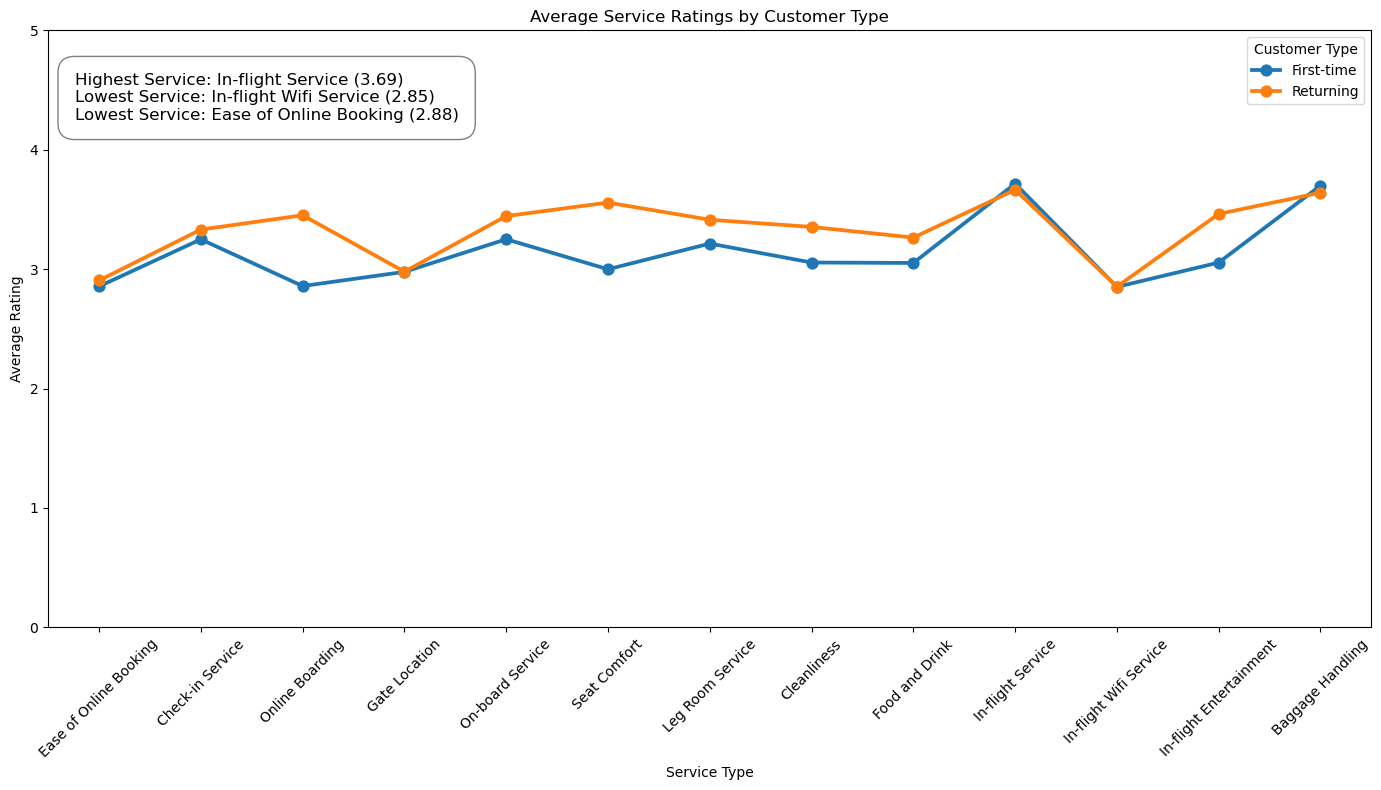

In [209]:
# Assuming the service columns are the same as before
service_columns = [
    'Ease of Online Booking', 
    'Check-in Service', 
    'Online Boarding', 
    'Gate Location', 
    'On-board Service', 
    'Seat Comfort', 
    'Leg Room Service', 
    'Cleanliness', 
    'Food and Drink', 
    'In-flight Service', 
    'In-flight Wifi Service', 
    'In-flight Entertainment', 
    'Baggage Handling'
]

# Group by 'Customer Type' and calculate mean for each service type
average_service_ratings = flight.groupby('Customer Type')[service_columns].mean().reset_index()

# Melt the DataFrame for easier plotting
average_service_ratings_melted = average_service_ratings.melt(id_vars='Customer Type', 
                                                               var_name='Service Type', 
                                                               value_name='Average Rating')

# Calculate the average ratings for each service type
average_ratings = average_service_ratings_melted.groupby('Service Type')['Average Rating'].mean()

# Identify the highest-rated service and the two lowest-rated services
highest_service = average_ratings.idxmax()
highest_score = average_ratings.max()
lowest_services = average_ratings.nsmallest(2).index.tolist()

# Prepare text for the box with highest and lowest scores
box_text = f"Highest Service: {highest_service} ({highest_score:.2f})\n"
for service in lowest_services:
    score = average_ratings[service]  # Get the score directly from the average ratings
    box_text += f"Lowest Service: {service} ({score:.2f})\n"

# Plotting
plt.figure(figsize=(14, 8))
sns.pointplot(data=average_service_ratings_melted, 
               x='Service Type', 
               y='Average Rating', 
               hue='Customer Type', 
               markers='o',  
               linestyles='-')

# Add a text box with the average ratings
plt.gca().text(0.02, 0.85, box_text.strip(), transform=plt.gca().transAxes,
               fontsize=12, bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=1'))

plt.title('Average Service Ratings by Customer Type')
plt.xlabel('Service Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Assuming ratings are between 0 and 5
plt.legend(title='Customer Type')

plt.tight_layout()
plt.show()


<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#8c2d45>Customer Types:</font></h4>

<b>First-time Customers (Blue Line):</b> These customers tend to give moderate ratings across most services, often below the midpoint of the scale (around 3). This suggests that first-time customers may have a less favorable experience overall.

<b>Returning Customers (Orange Line):</b> Returning customers generally provide higher ratings, indicating that their experiences improve with familiarity and repetition.

<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#8c2d45> Outperforming Services:</font></h4>

- In-flight Service: This service also receives high ratings, especially from returning customers (around 3.8), indicating consistent positive feedback.
  
- Seat Comfort rating appears to second best rated services in the analysis, with average ratings ranging from around 2.8 to 3.5 across both first-time and returning customers. This indicates a strong positive perception of this service with pleasant and comfortable travel among passengers



<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#8c2d45> Areas for Improvement:</font></h4>

In-flight Wi-Fi Service:
Ratings for in-flight Wi-Fi are significantly lower (around 2.5 to 3) for both customer types. First-time travelers may have higher expectations based on marketing or previous airline experiences. This sharp decline in ratings signals a need for immediate improvement to meet customer expectations.

Gate Location:
Lower satisfaction ratings for gate location suggest that passengers are facing issues or dissatisfaction with this aspect of their travel experience.


<div style="background-color:lightyellow; padding: 10px;">
    
##### **Ease of Online booking**- Optimize Mobile Experience: Implement responsive design and a dedicated mobile app to streamline the booking process on mobile devices.
- Integrate Real-Time Assistance: Add live chat support and chatbots to provide instant help and guidance during the booking process.

Implementing responsive design and a dedicated mobile app enhances the booking experience by ensuring that users can easily navigate and complete their bookings on any mobile device. This approach minimizes loading times, simplifies forms, and optimizes screen layouts for smaller displays, leading to a more intuitive and efficient booking process. Additionally, integrating real-time assistance features, such as live chat support and instant notifications, empowers users to resolve issues swiftly and receive updates on their bookings, further enhancing their satisfaction and conversion rates of future travels..


<div style="background-color:lightyellow; padding: 10px;">
    
##### **Technical Enhancements**

- Robust Wi-Fi Infrastructure: Invest in upgraded network to handle higher passenger loads during peak time, ensuring faster speeds and reliable service.
- Implement Quality of Service (QoS) Measures: Prioritize bandwidth for critical applications (e.g., streaming, browsing) to ensure a smoother user experience during flights.

To improve our onboard Wi-Fi service, we need to focus on two key areas. First, we should invest in a robust Wi-Fi infrastructure for faster speeds and reliable connectivity during peak times. Second, we need to implement Quality of Service measures. This will prioritize bandwidth for critical applications like Netflix and YouTube for streaming and browsing platforms like BBC news and Instagram, delivering a smoother user experience.

 By doing so, customers are likely to encounter fewer frustrations, leading to increased satisfaction and confidence in the airline's service.


<a id="delay"></a>
⬆️ [Tabel of Contents](#contents_label)
<h4 align="left"><font color=#8c2d45> 4.5 Delay Frequency & intervals</font></h4>

No Delay: 55052 passengers (61.3%)
0-5 min: 14226 passengers (15.8%)
6-10 min: 8565 passengers (9.5%)
11-15 min: 5058 passengers (5.6%)
16-20 min: 3199 passengers (3.6%)
21-30 min: 2971 passengers (3.3%)
31-60 min: 739 passengers (0.8%)
Over 60 min: 0 passengers (0.0%)


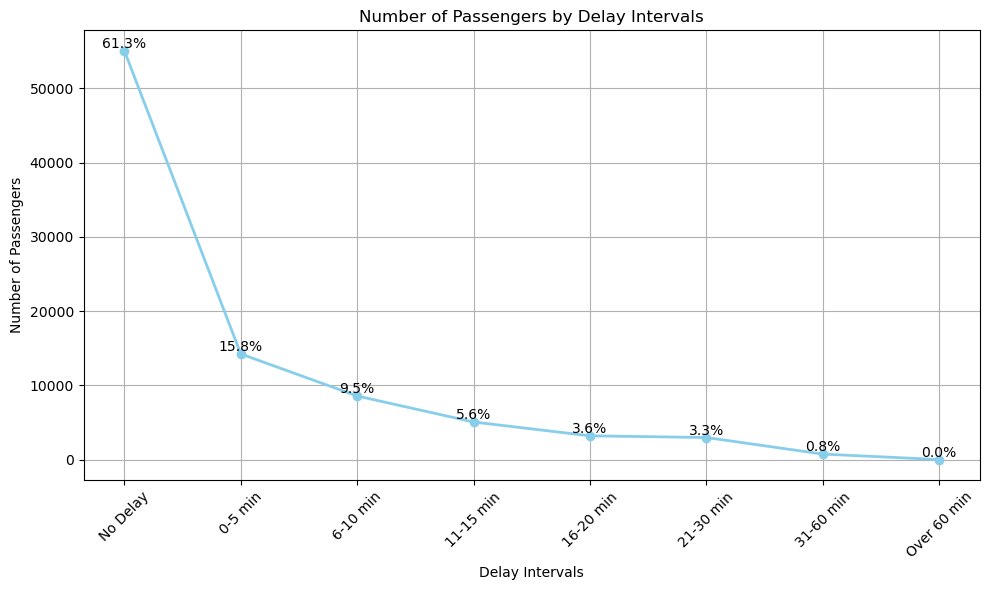

In [173]:
# Step 1: Calculate Overall Delay
flight['Overall_Delay'] = flight['Arrival Delay'] + flight['Departure Delay']

# Step 2: Define delay intervals (in minutes)
bins = [-np.inf, 0, 5, 10, 15, 20, 30, 60, np.inf]  # Define your intervals
labels = ['No Delay', '0-5 min', '6-10 min', '11-15 min', '16-20 min', '21-30 min', '31-60 min', 'Over 60 min']
flight['Delay_Interval'] = pd.cut(flight['Overall_Delay'], bins=bins, labels=labels)

# Step 3: Count passengers in each interval
delay_counts = flight['Delay_Interval'].value_counts().sort_index()

# Step 4: Calculate percentages
total_passengers = len(flight)
delay_percentages = (delay_counts / total_passengers) * 100

# Display the counts with percentages (1 decimal place)
for interval, count, pct in zip(delay_counts.index, delay_counts.values, delay_percentages.values):
    print(f"{interval}: {count} passengers ({pct:.1f}%)")

# Step 5: Plotting the counts with percentage labels as a line graph
plt.figure(figsize=(10, 6))
plt.plot(delay_counts.index, delay_counts.values, marker='o', color='skyblue', linestyle='-', linewidth=2)

# Add percentage labels to each point (1 decimal place)
for i, (count, pct) in enumerate(zip(delay_counts.values, delay_percentages.values)):
    plt.text(i, count, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Delay Intervals')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Delay Intervals')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d> Interpretation:</font></h4>
Based on the trend, more than 50,000 passengers experienced no delays whereas over 15,000 passegers felt delays from 5 - 60 min, about 30% of overall passengers.

The high percentage (61%) of on-time flights is a significant positive indicator of the airline's operational efficiency. It can be presented as a strength in marketing or customer communications to build trust and attract passengers.

However, it is pivotal to focuse on the remaining 39% of the passengers who experienced delays, as it could suggest underlying issues which can be prevented in the future flights.

<h4 align="left"><font color=#0c1c6d>Insights for Decision-making:</font></h4>
The airline has to categorize and identify (e.g., weather, technical issues, etc.) based on historical delays of potential areas for improvement. This could guide operational changes or investments in resources to manage customer expectations. This could elevate overall airline satisfcation leading to customer loyalty and retention.


Insights for Decision Making
Operational Improvements: Identify and address operational bottlenecks leading to delays, especially in the intervals that show the highest frequency.

Customer Communication: Develop strategies to communicate effectively with passengers regarding delays, particularly during peak delay intervals.

Strategic Planning: Use delay frequency data in strategic planning sessions to enhance flight scheduling, crew allocation, and customer service.

Continuous Monitoring: Establish a system for continuously monitoring delay frequencies and related customer feedback to inform future improvements.

 <a id="usage"></a>
⬆️ [Tabel of Contents](#contents_label)

<h4 align="left"><font color=#8c2d45> 4.6 Service Usage by Flight Distance Travelled</font></h4>

<div style="background-color:lightyellow; padding: 10px;">
Understanding Service Usage by Flight Distance Travelled is essential because:

1. Tailored Service Offerings:
 Different flight distances often have different passenger needs. Understanding which services are used more on long vs. short flights helps airlines tailor their offerings, ensuring that passengers are provided with what they value most on specific routes.

2. Optimizing Resources: Airlines can allocate resources more efficiently. For example, they can prioritize offering Wi-Fi and in-flight services on long-haul flights, while focusing on comfort and legroom for shorter distances where these services are more appreciated.

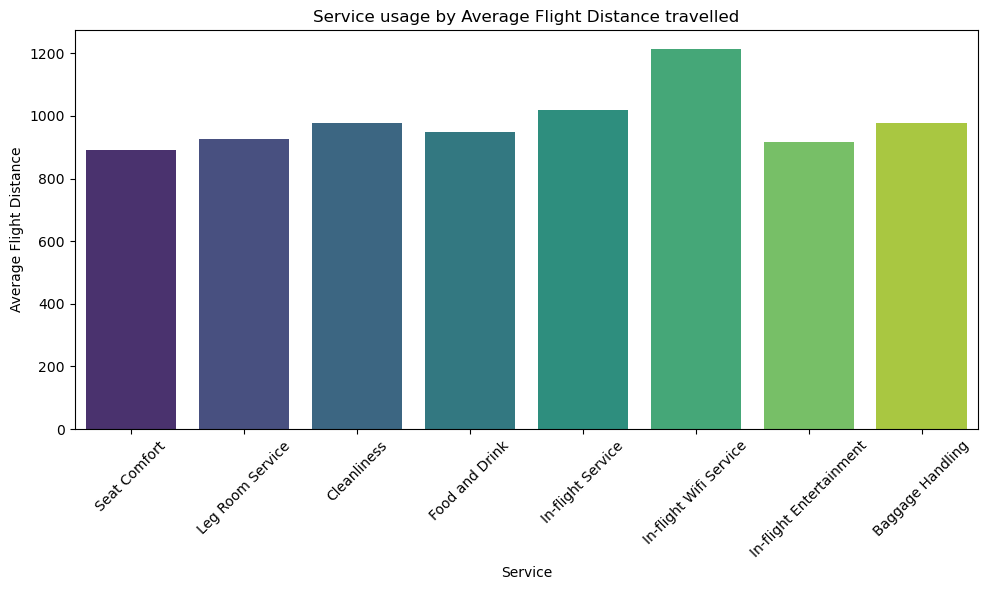

In [211]:
# Specify selected service columns
service_columns = [
    'Seat Comfort', 
    'Leg Room Service', 
    'Cleanliness', 
    'Food and Drink', 
    'In-flight Service', 
    'In-flight Wifi Service', 
    'In-flight Entertainment', 
    'Baggage Handling'
]

# Initialize an empty DataFrame to hold average distances per service
avg_distances = []

# Loop through each service column
for service in service_columns:
    # Calculate average flight distance where the service was used
    service_avg_distance = flight[flight[service] == 1]['Flight Distance'].mean()  # Assuming 1 indicates service usage
    avg_distances.append({'Service': service, 'Average Distance': service_avg_distance})

# Convert the results to a DataFrame
avg_distance_df = pd.DataFrame(avg_distances)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_distance_df, x='Service', y='Average Distance', palette='viridis')
plt.title('Service usage by Average Flight Distance travelled')
plt.xlabel('Service')
plt.ylabel('Average Flight Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




<div style="background-color:lightyellow; padding: 10px;">
    
<h4 align="left"><font color=#0c1c6d> Interpretation:</font></h4>

The chart provides a clear indication of which services are used more frequently based on flight distance, allowing for strategic service improvements where most effective:

- In-flight Wi-Fi Service and In-Flight service is associated with the highest average flight distance, suggesting that passengers on longer flights are more likely to use this service. This could be because Wi-Fi becomes more valuable during longer trips and also require onboard services to maintain customer satisfaction. 

- Entertainment, food and seatcomfort are used mainly on shorter flights. This suggests that might suggest that on shorter flights, passengers value and prioritise these services.

<h4 align="left"><font color=#0c1c6d>  Insights for Decision-making:</font></h4>

- Wi-Fi and In-flight Service investments should be prioritized for long-haul flights, as these services are most utilized on longer distances.
Enhancing Seat Comfort and Leg Room Service could benefit all types of flights, especially as they are relevant across both short and long distances.
Baggage Handling should be continuously monitored and improved as it’s frequently used across a broad range of flights, including medium-length trips.
<b>Business Strategies:</b>
s:
Enhance Long-Distance Flight Amenities:
Invest more in-flight Wi-Fi and onboard services for long-haul flights by partnering with tech providers for faster connections. 

Optimize Service Offerings for Shorter Flights:
Implement a “quick snack” with selection of popular snacks and beverages based on passenger preferences.




<a id="correlation"></a>
⬆️ [Tabel of Contents](#contents_label)
<h4 align="left"><font color=#8c2d45> 4.7 Multivariate Analysis</font></h4>

<div style="background-color:lightyellow; padding: 10px;">
Multivariate and correlation analysis play a vital role in understanding customer satisfaction. By focusing on specific service types, we can identify key relationships that significantly impact our customers' overall satisfaction.


Based on observations from previous analysis, we filtered specific service types to examine their correlations with customer satisfaction. This targeted approach revealed two critical insights:

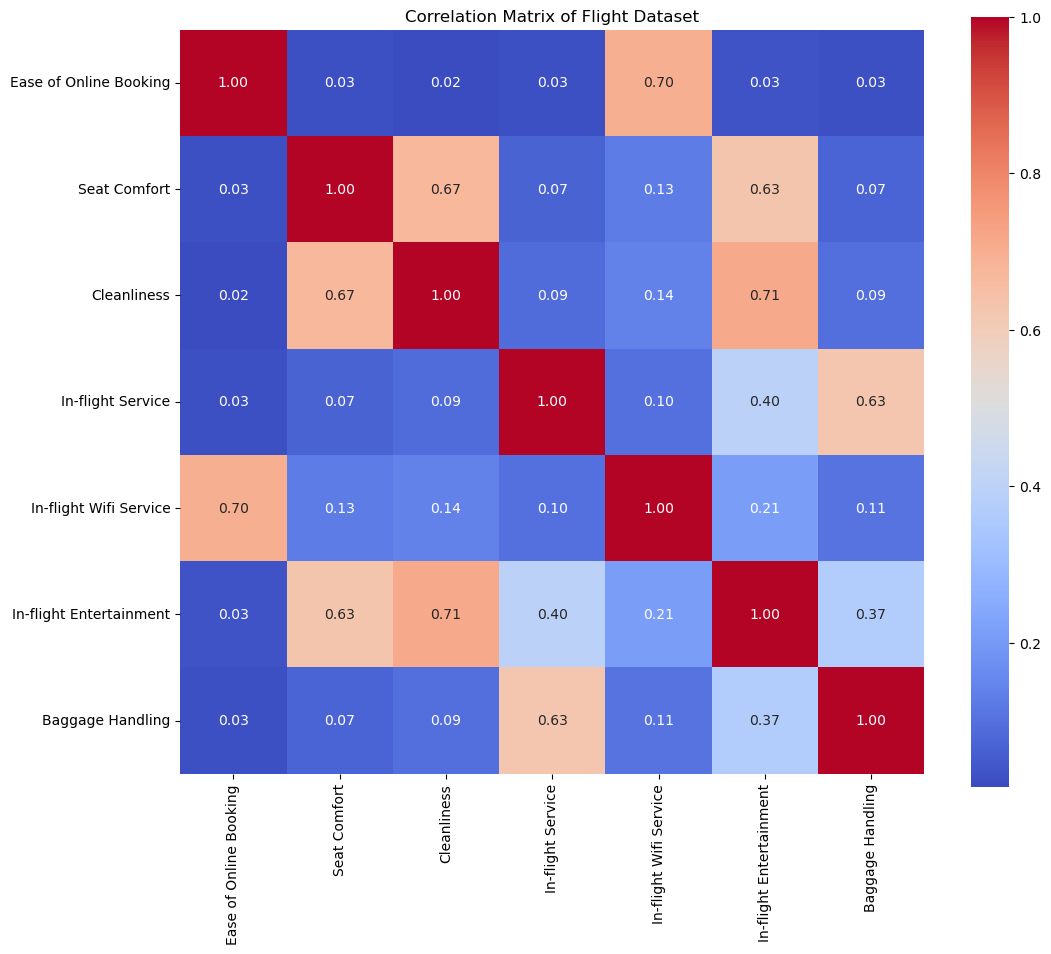

In [213]:
# Compute the correlation matrix
corr_matrix = flight.corr(numeric_only=True)
# Specify the columns you want to exclude
columns_to_exclude = ['ID', 'Flight Distance', 'Age', 'On-board Service','Food and Drink','Check-in Service','Gate Location','Departure Delay','Arrival Delay','Overall_Delay','Leg Room Service','Online Boarding','Average Score']  # Replace with the column names you want to exclude

# Drop the specified columns and compute the correlation matrix for the remaining columns
corr_matrix = flight.drop(columns=columns_to_exclude).corr(numeric_only=True)


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Flight Dataset')
plt.show()


<div style="background-color:lightyellow; padding: 10px;">
    
<h4 align="left"><font color=#0c1c6d> Interpretation:</font></h4>

1) In-flight entertainment and cleanliness have 0.71 correlation
2) Ease of Online Booking & In-flight Wi-Fi Service have 0.70 correlation

Given the correlation of these services and how they depend on each other, the airline should invest in improving these service.In summary, by leveraging these insights from correlation analysis, we can make informed strategic decisions that enhance our services and better meet our customers' satisfaction needs.s

<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d>Business Impact and Opportunities</font></h4>

Key areas for strategic decision making:

1. **Streamline Online Boarding**:  
   Improve the online check-in process with user-friendly interfaces and clear instructions. Enhancing this experience can significantly boost customer satisfaction.

2. **Upgrade In-flight Wi-Fi and Entertainment**:  
   Invest in reliable Wi-Fi and expand entertainment options. Providing better connectivity and diverse choices will enhance the travel experience, especially for business and younger travelers.



#### <a id="limitations"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45> 5. Data limitations & improvements</font></h3>


<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d><u>Constraints & Limitations</u></font></h4>

**1.Increase scope of the dataset:** The flight dataset, while informative, is limited in scope and should be expanded to include sentiments from soscial media for deeper analysis.

**2.Lack of Relevant Variables:**

Missing data on flight routes, dates of travel, and ticket prices may limit the ability to identify trends or correlations that could enhance the analysis.

**3. Presence of Missing values & Outliers:** Limits the accuracy and reliability of the analysis, potentially skewing results and obscuring true patterns in passenger satisfaction.

**4.Temporal Constraints:** If the dataset is not time-sensitive, seasonal trends or changes in consumer behavior over time may not be adequately captured, limiting insights.


**5.Sample Size Limitations:**

Imbalance Between Customer Types: With a significantly higher number of returning customers compared to first-time customers, the analysis may be skewed, potentially underrepresenting first-time customer experiences.

#### <a id="refinement"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>5.1 Data Collection and Refinement</font></h3>

<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d><u>Mitigation of Limitation & Constraints</u></font></h4>

**1.Expand Data Sources:** Integrate customer feedback from social media and online reviews to enhance understanding of customer sentiment.

**2.
Address Missing Values & Anomaly Detectio**n: Implement diverse imputation techniques & Use anomaly detection to spot unusual patterns in flight delay

**3.Enhance Variable Relevance:** Incorporate additional variables (e.g., flight routes, travel dates, ticket prices) to facilitate comprehensive analysis and trend identification.
    
 **4.Address Temporal Constraints:** Design datasets to be time-sensitive to capture seasonal trends and shifts in consumer behavior for deeper insights.
    
**5.Imbalance Between Customer Types:**  Higher proportion of returning customers skews the analysis.
    -  Expand sample population and use SMOTE technique to address imbalanced dataset and reduce overfitting.s.


#### <a id="model"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45> 6. Potential Future Work - Advanced Modeling </font></h3>

<div style="background-color:lightyellow; padding: 10px;">
Advanced modeling techniques, particularly machine learning, can play a vital role in enhancing service performance and flight operational efficiency.

Predictive Analytics will be crucial in this endeavor. By implementing machine learning algorithms, we can accurately predict customer satisfaction scores based on various factors such as flight distance, age group, and service ratings. This predictive capability will not only provide deeper insights into the elements that significantly affect customer experiences but also allow us to tailor services to meet specific needs.

<div style="background-color:lightyellow; padding: 10px;">

<h4 align="left"><font color=#0c1c6d>Advanced Modeling (Machine Learning):</font></h4>

<h5 align="left"><font color=#0c1c6d>Predictive Analytics:</font></h5> Implement machine learning algorithms to predict customer satisfaction scores based on various features such as flight distance, age group, and service ratings. This can provide insights into factors that significantly impact customer experiences and help in tailoring services accordingly.

<h4 align="left"><font color=#0c1c6d>Examples:</font></h4>
<h5 align="left"><font color=#0c1c6d>Random Forest:</font></h5> A versatile model effectively handles both regression and classification tasks. Its robustness against overfitting means it can be reliably used in varied scenarios. Additionally, Random Forest provides insights into feature importance, enabling us to identify which factors most significantly influence customer satisfaction.

<h5 align="left"><font color=#0c1c6d>K-Means Clustering:</font></h5> This technique helps us uncover patterns within our customer base, allowing for targeted marketing efforts and personalized services. By segmenting customers based on shared characteristics, we can create tailored experiences that resonate with different groups, enhancing customer loyalty.



<div style="background-color:lightyellow; padding: 10px;">

By leveraging these advanced modeling techniques, we can transform our data analysis into actionable strategies that drive continuous improvement in service performance and operational efficiency. This will ultimately lead to a more satisfying experience for our customers and a stronger competitive edge in the market.

#### <a id="conclusion"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>7. Overall Conclusion</font></h3>


<div style="background-color:lightyellow; padding: 10px;">
The insights gained from this analysis, along with the potential machine learning models discussed for future work, provide a robust foundation for actionable strategies. 

By recognizing the key drivers of satisfaction and performance, the airline can better understand customer preferences and travel behaviors. This understanding allows for strategic resource allocation, enabling the airline to offer a personalized flight experience that feels unique to each passenger. The primary strategies are:


<div style="background-color:lightyellow; padding: 10px;">
    
<h4 align="left"><font color=#0c1c6d>Understanding Customer Preferences:</font></h4> Data analysis provides actionable insights that enable the airline to make strategic decisions based on customer preferences, satisfaction levels, and travel behaviors.
<h4 align="left"><font color=#0c1c6d>Resource Allocation:</font></h4> Understanding service ratings and delays enables the airline to allocate resources effectively, ensuring that critical areas such as in-flight services and Wi-Fi connectivity are improved.
<h4 align="left"><font color=#0c1c6d>Personalization:</font></h4> Tailor experiences for frequent flyers and leveraging data on preferences, such as seating, meals, and entertainment.



<div style="background-color:lightyellow; padding: 10px;">
 By recognizing the key drivers of satisfaction and performance, the airline can better understand customer behaviors and travel expectations. This understanding allows for strategic resource allocation, enabling the airline to offer a personalized flight experience that feels unique and personal to each passenger. The airline can ensure a distinct, high-quality experience that differentiates them from competitors and fosters brand loyalty.

#### <a id="references"></a>
⬆️ [Tabel of Contents](#contents_label)
<h3 align="left"><font color=#8c2d45>8.References</font></h3>

1. Airline profitability outlook improves for 2024. IATA. (n.d.). https://www.iata.org/en/pressroom/2024-releases/2024-06-03-01/#:~:text=Revenue,be%2011.6%25%20year%20on%20year.

2. 
Atlassian. (n.d.). A complete guide to violin plots. https://www.atlassian.com/data/charts/violin-plot-complete-guide#:~:text=Violin%20plots%20are%20used%20when,groups%20are%20similar%20or%20different

3. 
Cirium. (2024, June 3). Predicting flight delays: How Airlines are harnessing AI to minimize disruptions. https://www.cirium.com/thoughtcloud/predicting-flight-delays-how-airlines-are-harnessing-ai-to-minimize-disruption

4.  
Communications Strategy Group. (2023, March 8). 11 aviation marketing strategies to boost revenue and Loyalty. Communications Strategy Group. https://wearecsg.com/blog/aviation-marketing-strategies6.

5. D 
Developers Google. (n.d.). Numerical Data: Binning  |  machine learning  |  google for developers. https://developers.google.com/machine-learning/crash-course/numerical-data/binning#:~:text=Binning%20(also%20called%20bucketing)%20is,and%20highest%20value%20is%20

6. 5. 
FasterCapital. (2024, June 23). Aviation marketing: Targeting the right audience: Key insights for aviation marketing. https://fastercapital.com/content/Aviation-Marketing--Targeting-the-Right-Audience--Key-Insights-for-Aviation-Marketing

7. Gml 
GeeksforGeeks. (2024, August 12). Interquartile range to detect outliers in data. https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-d8.

8. ata/ 
J.P. Morgan. (2024, July 1). Airline Industry Outlook: J.P. Morgan Research. Airline industry outlook | J.P. Morgan Research. https://www.jpmorgan.com/insights/global-research/travel/airline-outlook#:~:text=Overall%2C%20airlines%20expect%20international%20traffic,2024%E2%80%932026%20financial%20years.%E

9. 80%9D 
Klein, T. (2022, May 19). Airline passenger satisfaction. Kaggle. https://www.kaggle.com/datasets/teejmahal20/airline-passenger-sati

10. action 
LinkedIn. (2023, September 29). How can you effectively target age groups in your Leisure Travel Marketing Strategies?. How to Target Age 
    roups in Leisure Travel Marketing. https://www.linkedin.com/advice/0/how-can-you-effectively-target-age-groups-you
11. Max Steele. (2021, April 5). Feature engineering examples: Binning numerical features. Medium. https://towardsdatascience.com/feature-engineering-examples-binning-numerical-features-7627149093dom/






27149093d 




12. Miller, S. (2020, September 30). How to measure the quality of the in-flight connectivity experience. APEX. https://apex.aero/articles/measure-quality-flight-connectivity-experience/

13. Patil, P. (2024, January 30). How can you use airline crew scheduling research methods to reduce delays and cancellations?. How to Reduce Delays and Cancellations with Crew Scheduling Methods. https://www.linkedin.com/advice/1/how-can-you-use-airline-crew-scheduling-research-pgife

14. Preet, A. (2024, October 11). Dealing with outliers using the IQR method. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/09/dealing-with-outliers-using-the-iqr-method/

15. Singapore Airlines. (n.d.). Entertainment. Inflight Connectivity | Singapore Airlines. https://www.singaporeair.com/en_UK/sg/flying-withus/entertainment/inflight-connectivity/

16. SoftClouds. (2024, July 15). Taking flight 2024: How customer experience (CX) is revolutionizing the airline industry. Medium. https://softclouds.medium.com/taking-flight-2024-how-customer-experience-cx-is-revolutionizing-the-airline-industry-57a2807e6caf

17. Team, W., & Gavine, A. (2024, September 23). In-flight amenities news: Aircraft Interiors International Magazine. Aircraft Interiors International. https://www.aircraftinteriorsinternational.com/news/inflight-amenities

18. Technolabs, T. (2024, May 9). Streamlining check-in and boarding processes with computer vision. Software Development Company in Dallas. https://www.thetatechnolabs.com/blog-posts/streamlining-check-in-and-boarding-processes-with-computer-vision

19. Uspenskyi, S. (2024, April 18). Taking flight into the future or how chatbots make a difference in aviation. Springs. https://springsapps.com/knowledge/taking-flight-into-the-future-or-how-chatbots-make-a-difference-in-aviation

20. Wtce.expo. (2023, October 16). Reducing stress and improving comfort onboard: WTCE Hub. WTCE Hub | The latest insights for onboard services in airlines and rail. https://insights.worldtravelcateringexpo.com/2023/06/14/stress-and-comfort-onboard/

21. Your machine learning and Data Science Community. Kaggle. (n.d.). https://www.kaggle.com/

